# Практична робота 3 Описова статистика
### Мета роботи: ознайомитись з методикою первинної обробки статистичних даних; проаналізувати вплив способу представлення даних на їх інформативність.

## Основне завдання

### 1. Записати дані у data frame

In [511]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data2.csv', delimiter=';', decimal=',', encoding='cp1252')

### 2. Дослідити структуру даних

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


Бачимо, що дані мають структуру з 6 колонок, кількість ненульових значень у кожній; бачимо типи даних цих колонок і кількість використаної пам'яті.

### 3. Виправити помилки в даних

Перша помітна помилка - назва колонки 'Populatiion'. Перейменуємо її на правильне написання.

In [513]:
df = df.rename(columns={'Populatiion': 'Population'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Population      216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


Далі - перевіримо коректність числових даних. Переглянемо, чи є від'ємні значення серед числових колонок датафрейму.

In [514]:
incorrect_data = (df.select_dtypes('float64') < 0).any(axis=1)
print(df[incorrect_data])

           Country Name                     Region  GDP per capita  \
56   Dominican Republic  Latin America & Caribbean    -6722.223536   
135             Myanmar        East Asia & Pacific     1195.515372   

     Population  CO2 emission      Area  
56   10648791.0     21539.958   48670.0  
135  52885223.0     21631.633 -676590.0  


Бачимо, що від'ємні значення знаходяться в колонці 'GDP per capita' та в колонці 'Area'. Виправимо дані у цих колонках, замінивши значення у них на значення по модулю:

In [515]:
df['GDP per capita'] = df['GDP per capita'].abs()
df.Area = df.Area.abs()

Тепер знову поглянемо, чи є рядки з від'ємними даними в таблиці:

In [536]:
incorrect_data = (df.select_dtypes('float64') < 0).any(axis=1)
print(df[incorrect_data])

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Population, CO2 emission, Area, Population density, Total GDP, CO2 per capita]
Index: []


Тепер відповімо на питання 1 Додаткового завдання. Переглянемо, чи містить кожна з числових колонок пропущенні значення.

In [534]:
df.isna().any()

Country Name          False
Region                False
GDP per capita        False
Population            False
CO2 emission          False
Area                  False
Population density    False
Total GDP             False
CO2 per capita        False
dtype: bool

Як бачимо з колонки 'Non-Null Count', у колонках 2-5 містяться порожні значення. В такому випадку замінимо їх середніми значеннями.

In [533]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isna().any()

Country Name          False
Region                False
GDP per capita        False
Population            False
CO2 emission          False
Area                  False
Population density    False
Total GDP             False
CO2 per capita        False
dtype: bool

Тепер усі дані в датафреймі є коректними.

### 4. Побудувати діаграми розмаху та гістограми

Побудуємо діаграму розмаху для усіх числових колонок.

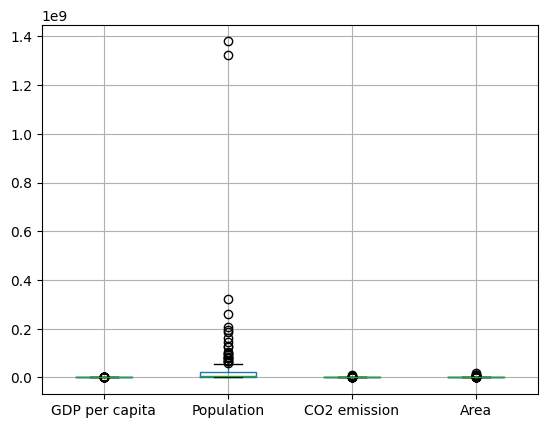

In [519]:
df.boxplot()
plt.show()

Побудуємо також окрему діаграму розмаху для колонки 'Population'.

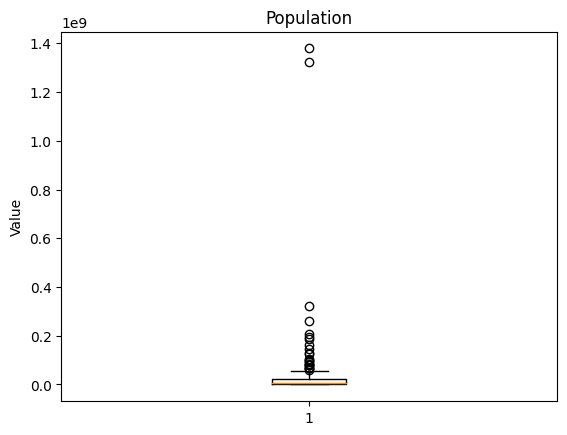

In [520]:
plt.boxplot(df.Population)
plt.title('Population')
plt.ylabel('Value')
plt.show()

Побудуємо гістограми для усіх числових колонок.

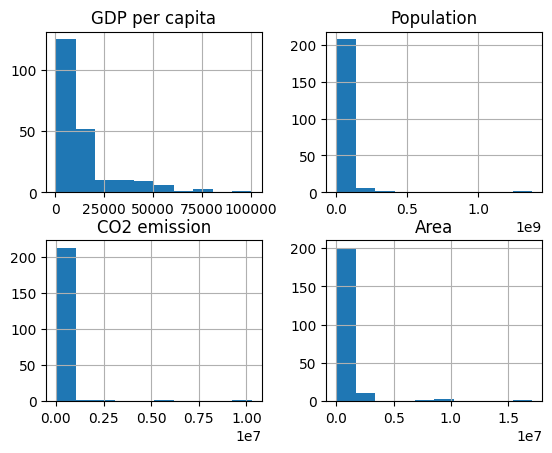

In [521]:
df.hist()
plt.show()

І побудуємо окрему гістограму для колонки 'GDP per capita'

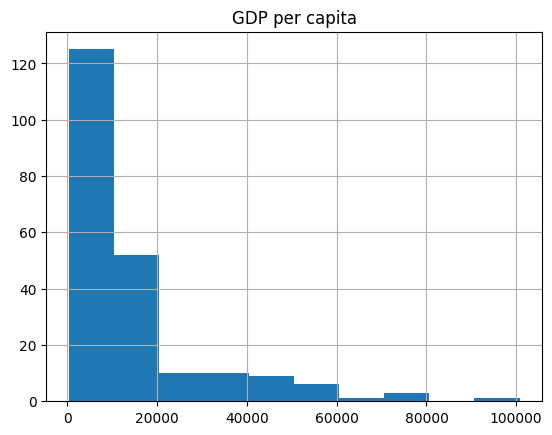

In [522]:
df['GDP per capita'].hist()
plt.title('GDP per capita')
plt.show()

### 5. Додати стовпчик із щільністю населення

Створимо нову колонку під назвою 'Population density' та виведемо для наочності необхідні колонки.

In [523]:
df['Population density'] = df.Population / df.Area
df[['Country Name', 'Population', 'Area', 'Population density']].head()

,Country Name,Population,Area,Population density
0,Afghanistan,34656032.0,652860.0,53.083405
1,Albania,2876101.0,28750.0,100.038296
2,Algeria,40606052.0,2381740.0,17.048902
3,American Samoa,55599.0,200.0,277.995000
4,Andorra,77281.0,470.0,164.427660


## Додаткове завдання

### 1. Чи є пропущені значення? Якщо є, замінити середніми

Завдання виконано у пункті 2 Основного завдання.

### 2. Яка країна має найбільший ВВП на людину (GDP per capita)? Яка має найменшу площу?

In [524]:
max_gdp_idx = df['GDP per capita'].idxmax()
print(f"{df.loc[max_gdp_idx, 'Country Name']} - країна з найбільшим ВВП на людину:")

min_area_idx = df.Area.idxmin()
print(f"{df.loc[min_area_idx, 'Country Name']} - країна з найменшою площею")

Luxembourg - країна з найбільшим ВВП на людину:
Monaco - країна з найменшою площею


### 3. В якому регіоні середня площа країни найбільша?

In [525]:
reg_avg_area = df.groupby('Region').Area.mean()
max_area_idx = reg_avg_area.idxmax()
print(f"{max_area_idx} - регіон з найбільшою середньою площею")

North America - регіон з найбільшою середньою площею


### 4. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?

In [526]:
max_pd_world = df['Population density'].idxmax()
print(f"{df.loc[max_pd_world, 'Country Name']} - країна з найбільшою щільністю населення в світі")

max_pd_eu_ca = df[df.Region == 'Europe & Central Asia']['Population density'].idxmax()
print(f"{df.loc[max_pd_eu_ca, 'Country Name']} - країна з найбільшою щільністю населення в Європі та Центральній Азії")

Macao SAR, China - країна з найбільшою щільністю населення в світі
Monaco - країна з найбільшою щільністю населення в Європі та Центральній Азії


### 5. Чи співпадає в якомусь регіоні середнє та медіана ВВП?

Спочатку обрахуємо колонку 'Total GDP'. Потім обрахуємо різницю між середнім та медіаною ВВП - співпадіння означає, що це значення дорівнює 0.

In [527]:
df['Total GDP'] = df['GDP per capita'] * df.Population
regs_gdp = df.groupby('Region')['Total GDP']
mean_mid_diff = abs(regs_gdp.mean() - regs_gdp.median())
print(f"Чи є регіони, де співпадають середнє та медіана ВВП? {mean_mid_diff.eq(0).any()}")
print(f"Найменша різниця між середнім на медіаною ввп - у {mean_mid_diff.idxmin()}: {mean_mid_diff.min()}")

Чи є регіони, де співпадають середнє та медіана ВВП? False
Найменша різниця між середнім на медіаною ввп - у Sub-Saharan Africa: 39063596613.28036


Як бачимо, нема регіону з такою умовою, і найближче до нуля значення у регіону 'Sub-Saharan Africa'.

### 6. Вивести топ 5 країн та 5 останніх країн по ВВП та кількості СО2 на душу населення.

Для початку додамо колонку для обрахунку значення кількості СО2
на душу населення.

In [528]:
df['CO2 per capita'] = df['CO2 emission'] / df.Population
df[['Country Name', 'CO2 per capita']]

,Country Name,CO2 per capita
0,Afghanistan,0.000283
1,Albania,0.001988
2,Algeria,0.003581
3,American Samoa,2.969732
4,Andorra,0.005979
...,...,...
212,Virgin Islands (U.S.),1.603813
213,West Bank and Gaza,0.036276
214,"Yemen, Rep.",0.000823
215,Zambia,0.000271


Тепер знайдемо 5 країн з найбільшим показником ВВП на душу населення.

In [529]:
print('5 країн з найбільшим показником ВВП на душу населення:')
df.nlargest(5, 'GDP per capita')

5 країн з найбільшим показником ВВП на душу населення:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,Total GDP,CO2 per capita
115,Luxembourg,Europe & Central Asia,100738.68420,582972.0,9658.878,2590.0,225.085714,5.872783e+10,0.016568
188,Switzerland,Europe & Central Asia,79887.51824,8372098.0,35305.876,41290.0,202.763333,6.688261e+11,0.004217
116,"Macao SAR, China",East Asia & Pacific,74017.18471,612167.0,1283.450,30.3,20203.531353,4.531088e+10,0.002097
146,Norway,Europe & Central Asia,70868.12250,5232929.0,47626.996,385178.0,13.585742,3.708479e+11,0.009101
92,Ireland,Europe & Central Asia,64175.43824,4773095.0,34066.430,70280.0,67.915410,3.063155e+11,0.007137


Знайдемо 5 країн з найменшим показником ВВП на душу населення.

In [530]:
print('5 країн з найбільшим показником ВВП на душу населення:')
df.nlargest(5, 'GDP per capita')

5 країн з найбільшим показником ВВП на душу населення:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,Total GDP,CO2 per capita
115,Luxembourg,Europe & Central Asia,100738.68420,582972.0,9658.878,2590.0,225.085714,5.872783e+10,0.016568
188,Switzerland,Europe & Central Asia,79887.51824,8372098.0,35305.876,41290.0,202.763333,6.688261e+11,0.004217
116,"Macao SAR, China",East Asia & Pacific,74017.18471,612167.0,1283.450,30.3,20203.531353,4.531088e+10,0.002097
146,Norway,Europe & Central Asia,70868.12250,5232929.0,47626.996,385178.0,13.585742,3.708479e+11,0.009101
92,Ireland,Europe & Central Asia,64175.43824,4773095.0,34066.430,70280.0,67.915410,3.063155e+11,0.007137


Тепер знайдемо 5 країн з найбільшим показником CO2 на душу населення.

In [531]:
print('5 країн з найбільшим показником CO2 на душу населення:')
df.nlargest(5, 'CO2 per capita')

5 країн з найбільшим показником CO2 на душу населення:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,Total GDP,CO2 per capita
182,St. Martin (French part),Latin America & Caribbean,13445.593416,31949.0,165114.116337,54.4,587.297794,4.295733e+08,5.168053
163,San Marino,Europe & Central Asia,47908.561410,33203.0,165114.116337,60.0,553.383333,1.590708e+09,4.972867
130,Monaco,Europe & Central Asia,13445.593416,38499.0,165114.116337,2.0,19249.500000,5.176419e+08,4.288790
145,Northern Mariana Islands,East Asia & Pacific,22572.378820,55023.0,165114.116337,460.0,119.615217,1.242000e+09,3.000820
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000,6.580000e+08,2.969732


І також 5 країн з найменшим показником CO2 на душу населення.

In [532]:
print('5 країн з найменшим показником CO2 на душу населення:')
df.nsmallest(5, 'CO2 per capita')

5 країн з найменшим показником CO2 на душу населення:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,Total GDP,CO2 per capita
61,Eritrea,Sub-Saharan Africa,13445.593416,3.432256e+07,696.730,117600.0,291.858502,4.614872e+11,0.000020
31,Burundi,Sub-Saharan Africa,285.727442,1.052412e+07,440.040,27830.0,378.157276,3.007029e+09,0.000042
175,Somalia,Sub-Saharan Africa,434.208810,1.431800e+07,608.722,637660.0,22.453966,6.217000e+09,0.000043
38,Chad,Sub-Saharan Africa,664.295652,1.445254e+07,729.733,1284000.0,11.255875,9.600761e+09,0.000050
44,"Congo, Dem. Rep.",Sub-Saharan Africa,405.542501,7.873615e+07,4671.758,2344860.0,33.578189,3.193086e+10,0.000059


### Висновок
В процесі виконання практичної роботи №3 набув умінь з первинної оброки статистичних даних, використовуючи мову програмування Python та бібліотеку pandas. Дані були завантажені з .csv-файлу та поміщені у датафрейм. У датафреймі були виправлені помилки в назві колонки та від'ємні числові дані. Після цього візуалізував дані, побудувавши діаграми розмаху та гістограми для колонок з числовими значеннями. Також додавались колонки з похідними значеннями, і на основі усіх цих даних буув проведений аналіз в процесі виконання пунктів 1-5 Додаткового завдання.